In [1]:
import pandas as pd
import numpy as np

#Import CSV & Clean input
data_raw = pd.read_csv('dialogs.csv', sep='\\t' )
data_input = data_raw["\"input"]

for x in range(len(data_input)):
   data_input.iloc[x] = data_input.iloc[x].strip("\"")

<ipython-input-1-3f9afbe0328c>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_raw = pd.read_csv('dialogs.csv', sep='\\t' )


In [2]:
#Import Spacy & Language Module
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
#Optional Module: Custom Stopwords

## New stop words list 
#customize_stop_words = [ ]

## Mark them as stop words
#for w in customize_stop_words:
#    nlp.vocab[w].is_stop = True


In [4]:
#Lemmetization & Removal of Stopwords 

data_cleaned = data_input

data_cleaned = data_cleaned.apply(lambda text: " ".join(token.lemma_ for token in nlp(text)))
#                                                  if not token.is_punct))

#is_stop
#These save as strings, not tokens

data_tokenised = data_cleaned.apply(lambda line: nlp(line))



In [5]:
#Import Gensim & Cython (technical support library) 
import gensim
from gensim.models import Word2Vec

import Cython

c:\users\beutler\appdata\local\programs\python\python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [6]:
#Transform into data useable by Word2Vec
data_model = data_cleaned.apply(lambda line: line.split())

data_model =  data_model.to_numpy().tolist()

In [12]:
#Train Model - Currently 1 iteration:
# min_count = minimum # of instances of a word to create a vector (default 5)
# vector_size = degrees of freedom (default 100, typically between 10 and a few hundred)
# -> Hyperparameters

# workers = Core parallelization (enabled by Cython), speeds up training
# sg = Training algorythm (here 1 is skip-gram)

model_base = Word2Vec(data_model, min_count=10, vector_size=325, workers=4, sg=1 )


#Note: Tokens are never equivalent, so they EACH count as a different word
# -> Should probably still be implemented, but neads to use the text attribute, rather than the tokens,
# needs a different transformation to the current one



In [13]:
print (len(model_base.wv))

#print(model_base.wv.get_vecattr("yes", "count") )

print(model_base.wv.index_to_key)

# Change Doc with 4.0:
# https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4


325
['.', 'be', 'I', '?', 'you', 'do', 'the', ',', 'to', 'it', 'a', 'that', "n't", 'what', 'have', 'go', 'of', 'he', 'they', 'and', 'in', 'we', 'like', 'so', 'my', 'for', 'yes', 'but', 'get', 'think', 'no', 'on', 'about', 'how', 'why', 'good', 'your', 'she', 'not', 'well', "'ll", 'want', 'too', 'know', 'there', 'with', 'really', 'see', 'at', 'will', 'this', 'one', 'would', 'all', 'can', 'look', 'just', '!', 'say', 'people', 'need', 'if', 'time', 'lot', 'should', 'nice', "'ve", 'then', 'make', 'right', 'out', 'take', 'school', 'money', 'mean', 'tell', 'oh', 'give', 'day', 'love', 'up', 'new', 'movie', 'much', '"', 'when', 'maybe', 'ca', 'come', 'course', 'sure', 'or', 'because', 'an', 'only', 'great', 'buy', 'car', 'today', 'who', 'okay', 'some', 'our', 'every', 'hear', 'use', 'something', "'s", 'eat', 'where', 'from', 'let', 'talk', 'thank', 'rain', 'more', 'his', 'next', 'now', 'house', 'start', 'work', 'job', 'problem', 'thing', '-', 'never', 'here', 'happen', 'other', 'year', 'off',

In [14]:
#COPY CODE WIP 
#Create Matrix for kMeans to use

# I am not yet completly sure what is happening here
# Source
# https://www.kdnuggets.com/2018/04/robust-word2vec-models-gensim.html


def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
feature_array = averaged_word_vectorizer(corpus=data_cleaned, model=model_base,
                                             num_features=325)
pd.DataFrame(feature_array)

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,-0.082973,0.141661,-0.076654,-0.062187,-0.027548,-0.003786,-0.091354,0.025302,-0.136383,-0.022409,...,-0.083160,-0.069877,-0.014073,-0.156778,0.050883,0.034980,-0.109086,-0.041057,-0.177540,0.014424
1,-0.083831,0.141639,-0.076117,-0.060672,-0.029270,-0.002235,-0.091882,0.023974,-0.137799,-0.021084,...,-0.082236,-0.069765,-0.020206,-0.153260,0.049130,0.036896,-0.107228,-0.043509,-0.175387,0.010346
2,-0.082627,0.138039,-0.074085,-0.058223,-0.027195,-0.003415,-0.088986,0.027214,-0.140363,-0.019061,...,-0.081147,-0.069683,-0.020891,-0.151736,0.048104,0.035642,-0.110443,-0.042147,-0.174862,0.007826
3,-0.084138,0.141796,-0.074487,-0.059021,-0.028616,-0.000943,-0.089627,0.025776,-0.135810,-0.019819,...,-0.082382,-0.069410,-0.019332,-0.155452,0.050575,0.037520,-0.109915,-0.042196,-0.174800,0.009144
4,-0.083509,0.140338,-0.076164,-0.058981,-0.027613,-0.001423,-0.090554,0.025758,-0.138997,-0.018991,...,-0.082126,-0.069956,-0.020486,-0.152031,0.048390,0.037050,-0.109526,-0.042879,-0.175321,0.009077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,-0.082658,0.137416,-0.073655,-0.056115,-0.025556,-0.001760,-0.087013,0.029359,-0.140139,-0.016672,...,-0.081291,-0.069710,-0.020619,-0.151858,0.048257,0.036318,-0.113549,-0.041087,-0.174589,0.006376
3721,-0.085506,0.144585,-0.077002,-0.061916,-0.029138,-0.000350,-0.090438,0.023646,-0.135371,-0.019957,...,-0.085156,-0.071760,-0.019714,-0.157530,0.050606,0.039413,-0.111721,-0.045011,-0.176961,0.009314
3722,-0.082454,0.137098,-0.071052,-0.056631,-0.026815,-0.003721,-0.086128,0.029391,-0.138885,-0.018541,...,-0.080678,-0.069083,-0.020193,-0.154142,0.049604,0.035276,-0.112975,-0.040556,-0.173991,0.006213
3723,-0.082556,0.137257,-0.072353,-0.056373,-0.026186,-0.002741,-0.086570,0.029375,-0.139512,-0.017606,...,-0.080985,-0.069396,-0.020406,-0.153000,0.048931,0.035797,-0.113262,-0.040822,-0.174290,0.006294


In [15]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



cls = MiniBatchKMeans(n_clusters=61)
cls.fit(feature_array)
cls.predict(feature_array)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = data_input.index.values
cluster_map['text'] = data_input.values
cluster_map['cluster'] = cls.labels_

cluster_map[cluster_map.cluster == 1]
cluster_map.to_csv(r'C:\Users\Beutler\Desktop\Data Exploration Project\Export.csv', index = False)

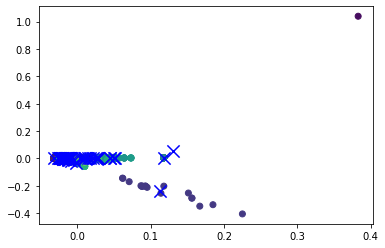

In [16]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_array)

reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.scatter( reduced_features[:,0], reduced_features[:,1], c=cls.predict(feature_array))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
